# 1. 如何统计收益率？
*价格变化的百分比的概率统计*

## 目录
1. 怎么计算累积收益率？
2. 如何计算收益率的均值与方差？
3. 如何用图显示收益分布？
4. 如何计算百分位？

## 怎么计算累积收益率？

一天收益率 = $\frac {P_t-P_{t-1}}{P_t}$

五天收益率 = $\frac {P_t-P_{t-5}}{P_t}$

十天收益率 = $\frac {P_t-P_{t-10}}{P_t}$

累积收益率 = $cumprod (1+r_n)$

date
2016-01-05    0.995970
2016-01-06    1.000602
2016-01-07    0.963609
2016-01-08    0.971669
2016-01-11    0.927158
Name: close, dtype: float64


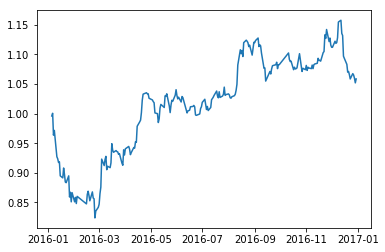

In [85]:
import tushare as ts
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

stock = ts.get_k_data('600036', start='2016-01-01', end='2016-12-31', 
                      ktype='D', autype='qfq')

stock.index = pd.to_datetime(stock['date'], format='%Y-%m-%d')
stock.pop('date')
# stock = pd.DataFrame(stock, dtype=np.float64)

returns = stock.close.pct_change()[1:]
r_add1 = returns+1
cumulative_r = r_add1.cumprod()
print cumulative_r.head()
plt.plot(cumulative_r)
plt.show()

## 如何计算收益率的均值与方差？
**均值计算：**

|类型|描述|例子|结果|
|:--:| :--:| :-----------: |:-----:|
|算术均值 Arithmetic Mean|数据的和除以数据的数量|(1+2+2+3+4+7+9) / 7|4|
|中值 Median|中间的那个值，把数据分成大小两半|1, 2, 2, 3, 4, 7, 9|3|
|众数 Mode|频度最大的那个数|1, 2, 2, 3, 4, 7, 9|2|

**方差与标准差：**

各数据偏离平均数的距离（离均差）的平均数。


$\sigma^2=\frac{1}{n-1}\sum^n_{i=1}(|x_i-\bar{x}|)^2$

$\sigma=\sqrt{\frac{1}{n-1}\sum^n_{i=1}(|x_i-\bar{x}|)^2}$

In [52]:
r = returns.dropna()

mean = r.mean()
median = r.median()
mode = r.mode()
var = r.var()
std = r.std()

print('mean', mean)
print('median', median)
print('mode', mode)
print('var', var)
print('std', std)

('mean', 0.00030787494115007137)
('median', 0.0005592841163311046)
('mode', 0    0.0
dtype: float64)
('var', 0.0001471251300357576)
('std', 0.012129514831012723)


## 如何用图显示收益分布？

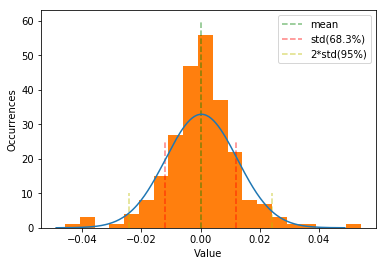

In [120]:
from scipy import stats
x = np.linspace(-(mean + 4*std),
                (mean + 4*std), len(returns))

y = stats.norm.pdf(x, mean, std)

plt.plot(x, y)
plt.hist(returns[1:], bins = 20)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.vlines(mean, 0, 60, linestyles='dashed'
           , alpha=0.5, color='g', label='mean')
plt.vlines([std, -std],  0, 25, linestyles='dashed'
           , alpha=0.5, color='r', label='std(68.3%)')
plt.vlines([2*std, -2*std], 0, 10, linestyles='dashed'
           , alpha=0.5, color='y', label='2*std(95%)')
plt.legend()
plt.show()

## 如何计算百分位？
百分位数 Percentile：如第五百分位，它表示在所有测量数据中，测量值的累计频次达5%。以回报率为例，回报率分布的第五百分位表示有5%的回报率小于此测量值，95%的回报率大于此测量值。

-0.018592992013
0.0194293693126


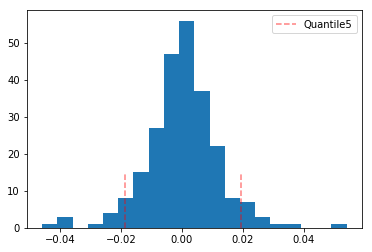

In [118]:
print returns.quantile(0.05)
print returns.quantile(0.95)

plt.hist(returns[1:], bins = 20)
plt.vlines([returns.quantile(0.05), returns.quantile(0.95)], 0, 15, linestyles='dashed'
           , alpha=0.5, color='r', label='Quantile5')
plt.legend()
plt.show()

## 作业
换一只股票计算分布与百分位